# An Introduction to Convolutional Neural Networks

### What are Convolutional Neural Networks?

They’re basically just neural networks that use Convolutional layers, a.k.a. Conv layers, which are based on the mathematical operation of convolution. Conv layers consist of a set of filters, which you can think of as just 2d matrices of numbers.


### Why use CNN instead of NN?
#### 1) Images are big

Imagine building a neural network to process 224x224 color images: including the 3 color channels (RGB) in the image, that comes out to 224 x 224 x 3 = 150,528 input features! A typical hidden layer in such a network might have 1024 nodes, so we’d have to train 150,528 x 1024 = 150+ million weights for the first layer alone.

--------------------

#### 2) Positions can change


If you trained a network to detect dogs, you’d want it to be able to a detect a dog regardless of where it appears in the image. Imagine training a network that works well on a certain dog image, but then feeding it a slightly shifted version of the same image. The dog would not activate the same neurons, so the network would react completely differently!


#### Same padding =  input and output have the same dimensions
#### Valid padding = not

In [2]:
import numpy as np
import mnist

In [3]:
# conv.py
class Conv3x3:
  # A Convolution layer using 3x3 filters.

  def __init__(self, num_filters):
    self.num_filters = num_filters

    # filters is a 3d array with dimensions (num_filters, 3, 3)
    # We divide by 9 to reduce the variance of our initial values
    self.filters = np.random.randn(num_filters, 3, 3) / 9

  def iterate_regions(self, image):
    '''
    Generates all possible 3x3 image regions using valid padding.
    - image is a 2d numpy array
    '''
    h, w = image.shape

    for i in range(h - 2):
      for j in range(w - 2):
        im_region = image[i:(i + 3), j:(j + 3)]
        yield im_region, i, j

  def forward(self, input):
    '''
    Performs a forward pass of the conv layer using the given input.
    Returns a 3d numpy array with dimensions (h, w, num_filters).
    - input is a 2d numpy array
    '''
    h, w = input.shape
    output = np.zeros((h - 2, w - 2, self.num_filters))

    for im_region, i, j in self.iterate_regions(input):
      output[i, j] = np.sum(im_region * self.filters, axis=(1, 2))

    return output

In [6]:
# cnn.py
# The mnist package handles the MNIST dataset for us!
# Learn more at https://github.com/datapythonista/mnist
train_images = mnist.train_images()
train_labels = mnist.train_labels()

conv = Conv3x3(8)
output = conv.forward(train_images[0])
print(output.shape) # (26, 26, 8)

(26, 26, 8)


# CONV WITH IMG

In [4]:
x = np.array([
    [ 8, 8, 8, 8],
    [ 8, 8, 8, 8],
    [ 8, 8, 8, 8],
    [ 8, 8, 8, 8]])

W = np.array([
    [2, 1],
    [0, 3]])

### Valid padding

- (8 x 2) + (8 x 1) + (8 x 0) + (8 x 3) = 16 + 8 + 0 + 24 = 48

In [5]:
from scipy import signal

signal.convolve2d(x, W, mode='valid')

array([[48, 48, 48],
       [48, 48, 48],
       [48, 48, 48]])

### Sobel filter

In [29]:
import cv2 # pip3 install opencv-python for main modules

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = np.float)
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = np.float)

image = cv2.imread('./dog.jpg', 0) # image of a dog 

print(sobel_x, "Sobel kernel X\n")
print(sobel_y, "Sobel kernel Y\n")

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]] Sobel kernel X

[[ 1.  2.  1.]
 [ 0.  0.  0.]
 [-1. -2. -1.]] Sobel kernel Y



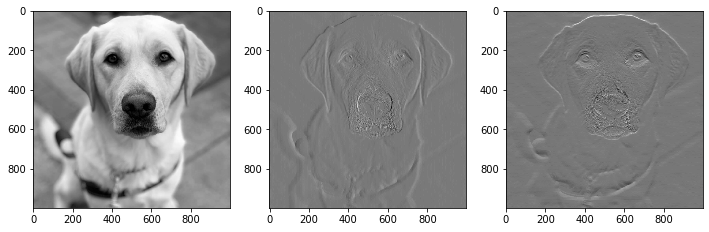

In [28]:
# use sobel filter over image 
import matplotlib.pyplot as plt 

image_sobel_x = signal.convolve2d(image, sobel_x, mode='valid')
image_sobel_y = signal.convolve2d(image, sobel_y, mode='valid')
fig,((a,b,c)) = plt.subplots(1,3, figsize=(12,12))

a.imshow(image, cmap="gray")
b.imshow(image_sobel_x, cmap="gray")
c.imshow(image_sobel_y, cmap="gray")

### apply convolution with random filters

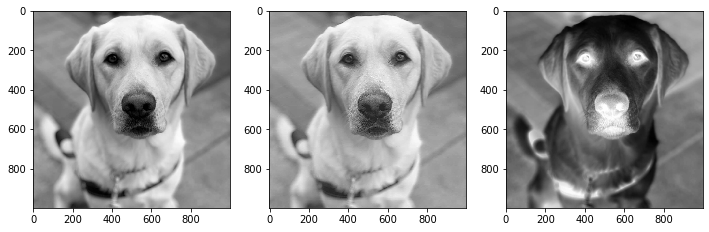

In [30]:
W1 = np.random.randint(-100, 100, (3,3))
W2 = np.random.randint(-2, 2, (3,3))

image_rand_w1_x = signal.convolve2d(image, W1, mode='valid')
image_rand_w2_x = signal.convolve2d(image, W2, mode='valid')
fig,((a,b,c)) = plt.subplots(1,3, figsize=(12,12))

a.imshow(image, cmap="gray")
b.imshow(image_rand_w1_x, cmap="gray")
c.imshow(image_rand_w2_x, cmap="gray")

..............

### max pooling

In [31]:
x = np.array(
    [[ 304, -779, -424,  287],
     [-385,  617, -665,  738],
     [ 497,  974,  390, -678],
     [-669, -854,  661, -919]])

In [32]:
k_size = 2
MK = x.shape[0] // k_size
NL = x.shape[1] // k_size
print(x[:MK*k_size, :NL*k_size].reshape(MK, k_size, NL, k_size).max(axis=(1, 3)))

[[617 738]
 [974 661]]


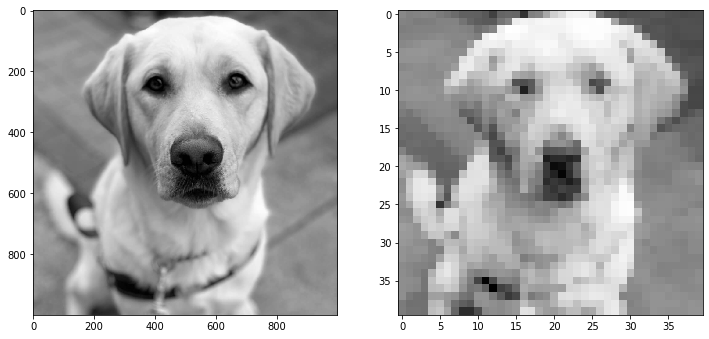

In [38]:
k_size = 25 # hoe groter k, hoe meer pixels 
MK = image.shape[0] // k_size
NL = image.shape[1] // k_size

image_max_pool_2 = image[:MK*k_size, :NL*k_size].reshape(MK, k_size, NL, k_size).max(axis=(1, 3))
fig,((a,b)) = plt.subplots(1,2, figsize=(12,12))

a.imshow(image, cmap="gray")
b.imshow(image_max_pool_2, cmap="gray")